In [ ]:
pip install scikit-opt

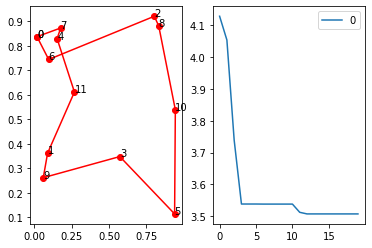

In [10]:
from __future__ import division
import numpy as np
from scipy import spatial
import pandas as pd
import matplotlib.pyplot as plt
from sko.ACA import ACA_TSP

# Criação dos 12 nós referentes a cada uma das cidades
num_points = 12
# Definição das coordenadas x e y dessas cidades no gráfico e definição dos pesos de cada uma das arestas.
points_coordinate = np.random.rand(num_points, 2)
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')


def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


def main():
    aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
                  size_pop=10, max_iter=20,
                  distance_matrix=distance_matrix)
    best_x, best_y = aca.run()
    # Plot the result
    fig, ax = plt.subplots(1, 2)
    best_points_ = np.concatenate([best_x, [best_x[0]]])
    best_points_coordinate = points_coordinate[best_points_, :]
    for index in range(0, len(best_points_)):
        ax[0].annotate(best_points_[index], (best_points_coordinate[index, 0], best_points_coordinate[index, 1]))
    ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
    pd.DataFrame(aca.y_best_history).cummin().plot(ax=ax[1])
    plt.show()


if __name__ == "__main__":
    main()